# KNN Ruzhytskyi Dmytro

## Імпорт бібліотек

In [51]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Функція нормалізації


In [52]:
def normalization(data):
    return [(x - min(data)) / (max(data) - min(data)) for x in data]

## Генеруємо вхідні ознаки та відповіді у межах [0, 1]

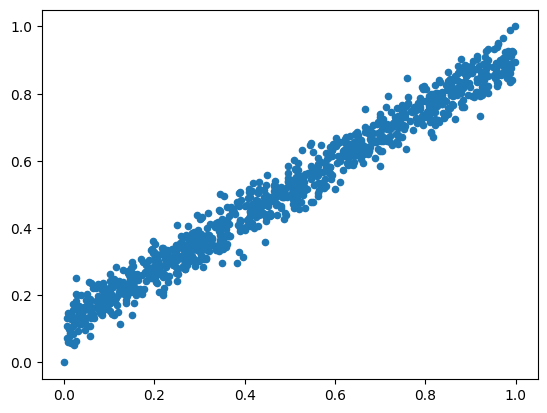

In [53]:
n = 1000
x = np.random.rand(n)
y = 13 * x + 18 + np.random.randn(n) * 0.6
y = normalization(y)
df = pd.DataFrame({'x': x, 'y': y})
x = df[['x']].values
plt.scatter(x, y, s=20)
plt.show()

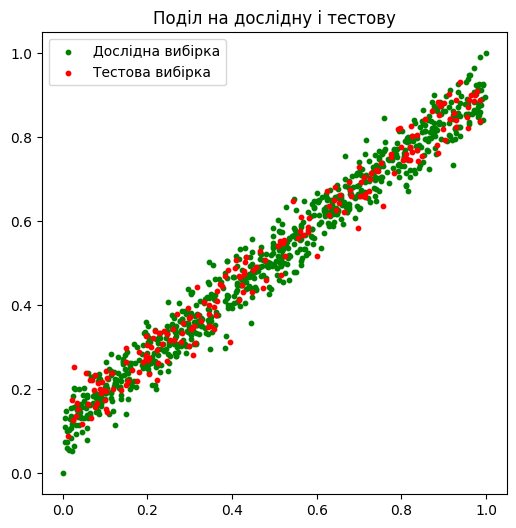

In [54]:
plt.figure(figsize=(6, 6))

# рандомне розділення 80/20
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# графік для 2-ох вибірок
plt.scatter(X_train, y_train, s = 10, color='green', label='Дослідна вибірка')
plt.scatter(X_test, y_test, s = 10, color='red', label='Тестова вибірка')
plt.legend()
plt.title('Поділ на дослідну і тестову')
plt.show()
     


## Метод для обрахунку KNN-регресії та побудова графіку

In [55]:
def knn_regression(k, X, y, name):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X, y)
    y_pred = model.predict(X)

    # Обрахунок похибок
    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)
    
    sorted_indices = X.squeeze().argsort()
    X_sorted = X[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]
    # Побудова графіку
    plt.figure(figsize=(5, 5))
    plt.plot(X_sorted, y_pred_sorted, linewidth=0.9, color='red', label='Регресія')
    plt.scatter(X, y, s=10, label=f'{name} вибірка')
    plt.legend()
    plt.title(f"Лінія регресії при k = {k}\n{name} вибірка")
    plt.grid(True)
    plt.show()

    # Вивід метрик та параметрів
    print(f"\t{name} вибірка")
    print(f"Коефіцієнт детермінації: {r_squared}")
    print(f"Середньоквадратична похибка: {mse}")

    return [mse, r_squared, k]


### Дослідницька вибірка

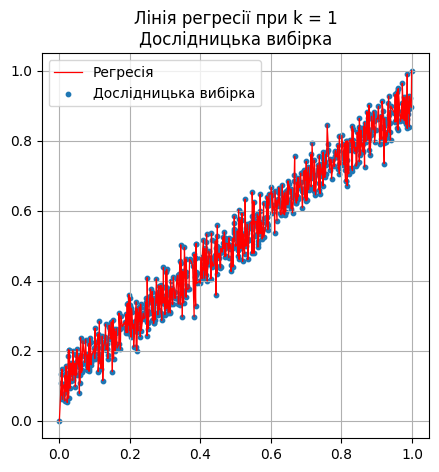

	Дослідницька вибірка
Коефіцієнт детермінації: 1.0
Середньоквадратична похибка: 0.0


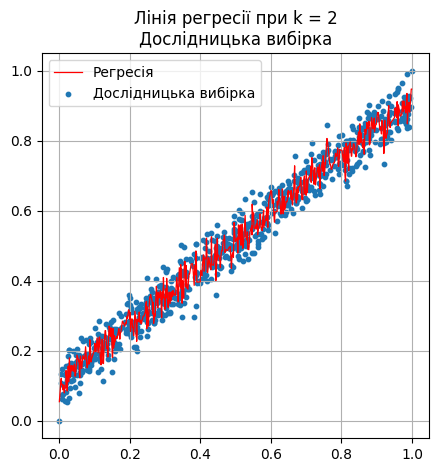

	Дослідницька вибірка
Коефіцієнт детермінації: 0.9855495662791424
Середньоквадратична похибка: 0.000795584953583704


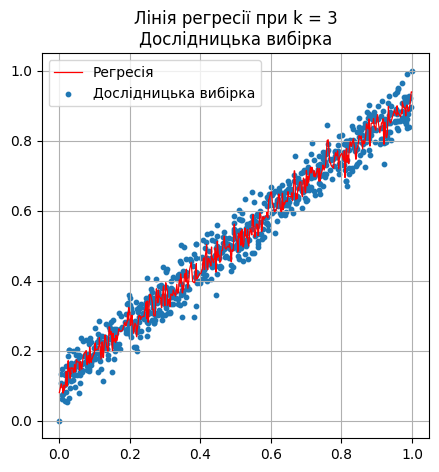

	Дослідницька вибірка
Коефіцієнт детермінації: 0.982254810825815
Середньоквадратична похибка: 0.0009769814372492121


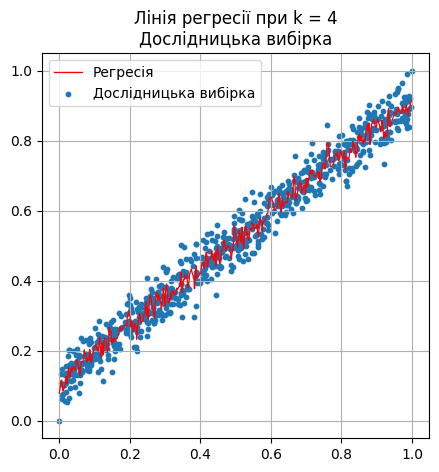

	Дослідницька вибірка
Коефіцієнт детермінації: 0.9797295884720479
Середньоквадратична похибка: 0.0011160104067541555


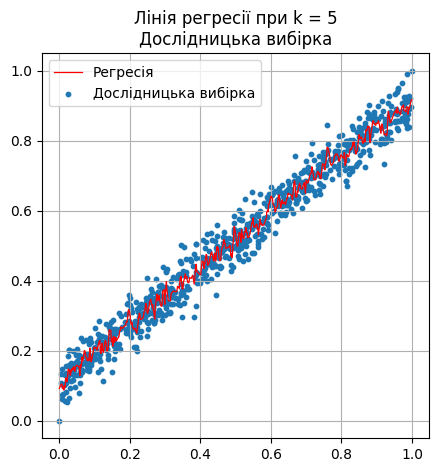

	Дослідницька вибірка
Коефіцієнт детермінації: 0.9783830868350467
Середньоквадратична похибка: 0.0011901435755619358


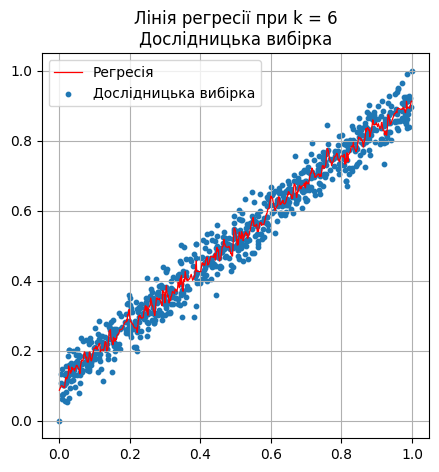

	Дослідницька вибірка
Коефіцієнт детермінації: 0.9770255444304832
Середньоквадратична похибка: 0.0012648846063009422


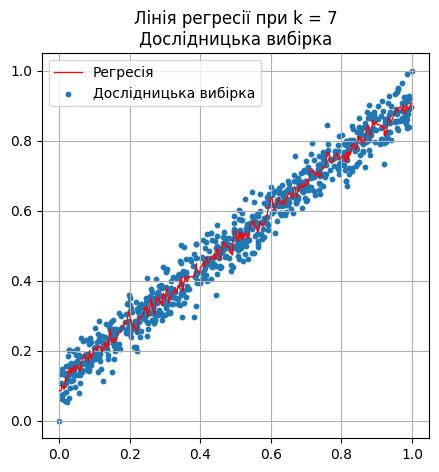

	Дослідницька вибірка
Коефіцієнт детермінації: 0.976692470213185
Середньоквадратична похибка: 0.0012832223836180784


In [56]:
error_results_train = [
    knn_regression(k, X_train, y_train, "Дослідницька") for k in range(1, 8)
]

In [63]:
error_results_df_train = pd.DataFrame(error_results_train, columns=['Середн.квадр. похибка', 'Коеф. детермінації', 'К-сть сусідів'])
print("Дослідницька вибірка:")
display(error_results_df_train)

Дослідницька вибірка:


,Середн.квадр. похибка,Коеф. детермінації,К-сть сусідів
0,0.000000,1.000000,1
1,0.000796,0.985550,2
2,0.000977,0.982255,3
3,0.001116,0.979730,4
4,0.001190,0.978383,5
5,0.001265,0.977026,6
6,0.001283,0.976692,7


### Тестова вибірка

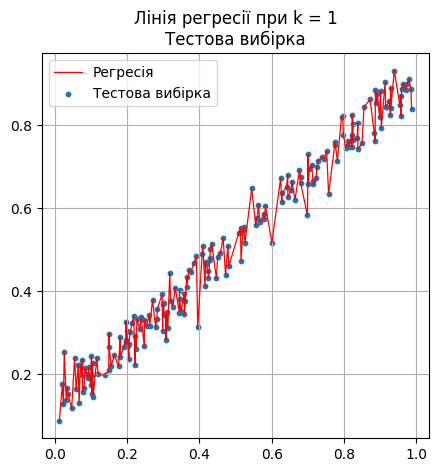

	Тестова вибірка
Коефіцієнт детермінації: 1.0
Середньоквадратична похибка: 0.0


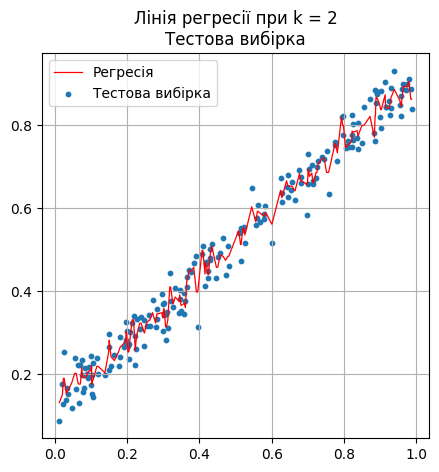

	Тестова вибірка
Коефіцієнт детермінації: 0.9867207841649728
Середньоквадратична похибка: 0.000749091748174511


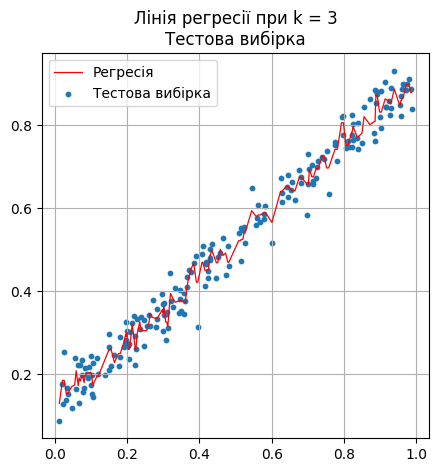

	Тестова вибірка
Коефіцієнт детермінації: 0.9834278223874064
Середньоквадратична похибка: 0.0009348504951723877


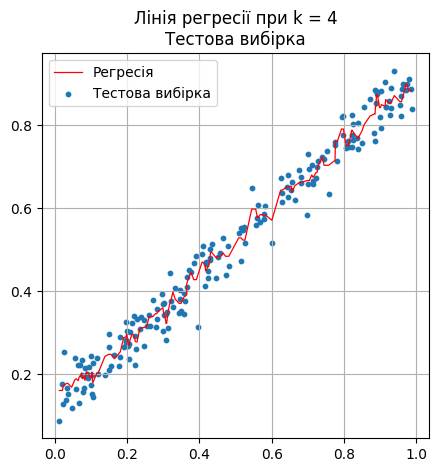

	Тестова вибірка
Коефіцієнт детермінації: 0.9806719287377109
Середньоквадратична похибка: 0.001090312776792068


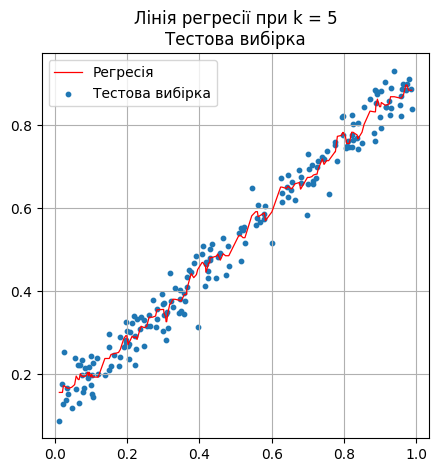

	Тестова вибірка
Коефіцієнт детермінації: 0.9792288385285728
Середньоквадратична похибка: 0.0011717187107693836


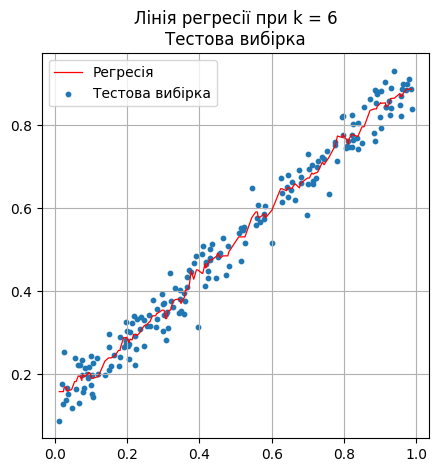

	Тестова вибірка
Коефіцієнт детермінації: 0.9779506372875039
Середньоквадратична похибка: 0.0012438231191988025


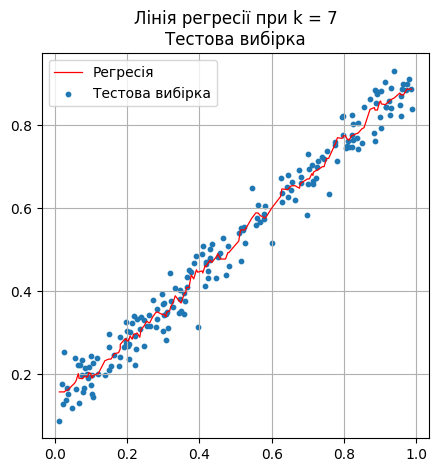

	Тестова вибірка
Коефіцієнт детермінації: 0.9772943229620845
Середньоквадратична похибка: 0.0012808463630023614


In [58]:
error_results_test = [
    knn_regression(k, X_test, y_test, "Тестова") for k in range(1, 8)
]

In [62]:
error_results_df_test = pd.DataFrame(error_results_test, columns=['Середн.квадр. похибка', 'Коеф. детермінації', 'К-сть сусідів'])
print("Тестова вибірка:")
display(error_results_df_test)

Тестова вибірка:


,Середн.квадр. похибка,Коеф. детермінації,К-сть сусідів
0,0.000000,1.000000,1
1,0.000749,0.986721,2
2,0.000935,0.983428,3
3,0.001090,0.980672,4
4,0.001172,0.979229,5
5,0.001244,0.977951,6
6,0.001281,0.977294,7
